In [86]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot  as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

In [87]:
train_df = pd.read_csv('train.csv')


train_df['Source'] = 'train'
print(train_df.shape)

(54808, 15)


In [88]:
test_df = pd.read_csv('test.csv')
test_df['Source'] = 'test'
print(test_df.shape)
test_df.head()

(23490, 14)


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,Source
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77,test
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51,test
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47,test
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65,test
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61,test


In [89]:
df = pd.concat([train_df,test_df],ignore_index=True)
df.shape

(78298, 15)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78298 entries, 0 to 78297
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           78298 non-null  int64  
 1   department            78298 non-null  object 
 2   region                78298 non-null  object 
 3   education             74855 non-null  object 
 4   gender                78298 non-null  object 
 5   recruitment_channel   78298 non-null  object 
 6   no_of_trainings       78298 non-null  int64  
 7   age                   78298 non-null  int64  
 8   previous_year_rating  72362 non-null  float64
 9   length_of_service     78298 non-null  int64  
 10  KPIs_met >80%         78298 non-null  int64  
 11  awards_won?           78298 non-null  int64  
 12  avg_training_score    78298 non-null  int64  
 13  is_promoted           54808 non-null  float64
 14  Source                78298 non-null  object 
dtypes: float64(2), int6

In [91]:
## check duplicate entry 
df['employee_id'].duplicated().sum()

0

In [92]:
## Function for check null values  
def check_null_values(df_name , col_name=''):
    """ 
    Function to check null values in dataframe and indivudal column name. 
    function return tuple of detailed null values of dataframe and column individual. 
    """
    nulls_value = df_name.isnull().sum().reset_index()
    nulls_percentage = round(100*(df_name.isnull().sum()/len(df_name)),2).reset_index()
    null_df = pd.merge(nulls_value,nulls_percentage, on='index')
    null_df = null_df.rename(columns = {'index' : 'Column_name', '0_x' : 'number_of_missingValues', '0_y' : 'percentageOfMissing'})
    null_value_columns = null_df[null_df['Column_name'] == col_name]
    
    return null_df , null_value_columns   

In [93]:
## Check nullvalues
all_null_df , col_null_df = check_null_values(df)
all_null_df

,Column_name,number_of_missingValues,percentageOfMissing
0,employee_id,0,0.00
1,department,0,0.00
2,region,0,0.00
3,education,3443,4.40
4,gender,0,0.00
5,recruitment_channel,0,0.00
6,no_of_trainings,0,0.00
7,age,0,0.00
8,previous_year_rating,5936,7.58
9,length_of_service,0,0.00


In [94]:
df['education'].value_counts(dropna=False)

Bachelor's          52247
Master's & above    21429
NaN                  3443
Below Secondary      1179
Name: education, dtype: int64

In [95]:
df['education'].fillna("Master's & above" , inplace=True)

In [96]:
df['education'].value_counts(dropna=False)

Bachelor's          52247
Master's & above    24872
Below Secondary      1179
Name: education, dtype: int64

In [97]:
df['previous_year_rating'].value_counts(dropna=False)

3.0    26539
5.0    16838
4.0    14126
1.0     8903
2.0     5956
NaN     5936
Name: previous_year_rating, dtype: int64

In [98]:
df['previous_year_rating'].fillna(3.0 , inplace=True)

In [99]:
df['previous_year_rating'].value_counts(dropna=False)

3.0    32475
5.0    16838
4.0    14126
1.0     8903
2.0     5956
Name: previous_year_rating, dtype: int64

In [100]:
## Check nullvalues
all_null_df , col_null_df = check_null_values(df)
all_null_df

,Column_name,number_of_missingValues,percentageOfMissing
0,employee_id,0,0.0
1,department,0,0.0
2,region,0,0.0
3,education,0,0.0
4,gender,0,0.0
5,recruitment_channel,0,0.0
6,no_of_trainings,0,0.0
7,age,0,0.0
8,previous_year_rating,0,0.0
9,length_of_service,0,0.0


In [101]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,78298.000000,78298.000000,78298.000000,78298.000000,78298.000000,78298.000000,78298.000000,78298.000000,54808.000000
mean,39149.500000,1.253378,34.797619,3.307032,5.848974,0.354032,0.023053,63.349664,0.085170
std,22602.830026,0.606766,7.665928,1.215425,4.248070,0.478222,0.150073,13.383664,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19575.250000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39149.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58723.750000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [102]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted', 'Source'],
      dtype='object')

In [103]:
## Clean the column_name
df.rename(columns={'KPIs_met >80%':'KPIs_metgreater80','awards_won?':'awards_won'}, inplace=True)
df.columns


Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_metgreater80', 'awards_won',
       'avg_training_score', 'is_promoted', 'Source'],
      dtype='object')

In [104]:
## numerical features
numarical_col = df.describe().columns
numarical_col

Index(['employee_id', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_metgreater80', 'awards_won',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [105]:
categorial_col = df.select_dtypes(exclude=['int64','float64']).columns
categorial_col

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'Source'],
      dtype='object')

In [106]:
df1 = df.copy()

In [107]:
numarical_col[1:-1]

Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_metgreater80', 'awards_won', 'avg_training_score'],
      dtype='object')

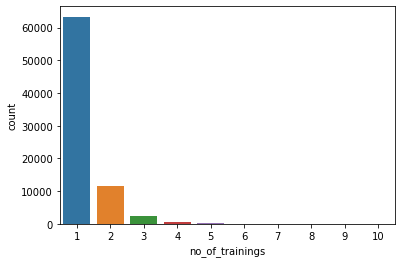

In [108]:
col = numarical_col[1]
sns.countplot(df1[col])

Text(0.5, 1.0, 'age')

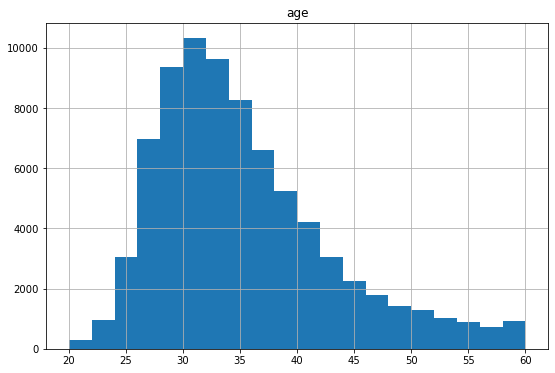

In [109]:
col = numarical_col[2]
fig = plt.figure(figsize=(9,6))
ax = fig.gca()
feature = df1[col]
feature.hist(bins=20, ax=ax)
#ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
#ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
ax.set_title(col)

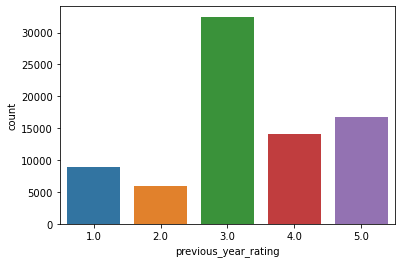

In [110]:
col = numarical_col[3]
sns.countplot(df1[col])

Text(0.5, 1.0, 'length_of_service')

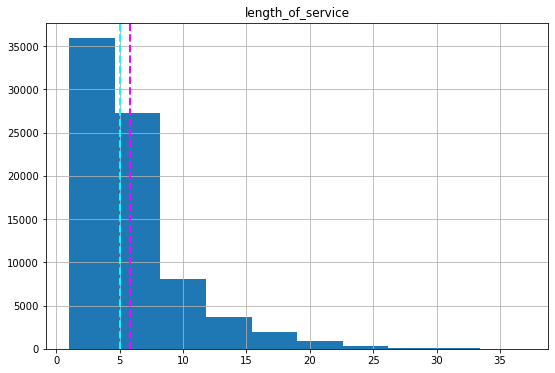

In [111]:
col = numarical_col[4]

fig = plt.figure(figsize=(9,6))
ax = fig.gca()
feature = df1[col]
feature.hist(bins=10, ax=ax)
ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
ax.set_title(col)

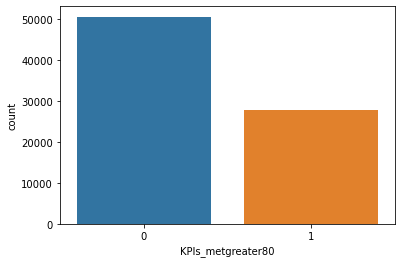

In [112]:
col = numarical_col[5]
df1[col].value_counts()
sns.countplot(df1[col])

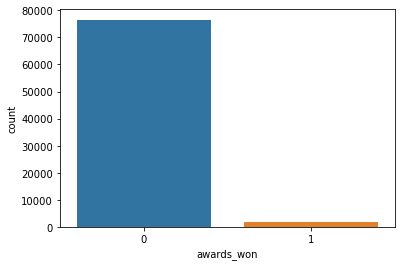

In [113]:
col = numarical_col[6]
df1[col].value_counts()
sns.countplot(df1[col])

Text(0.5, 1.0, 'avg_training_score')

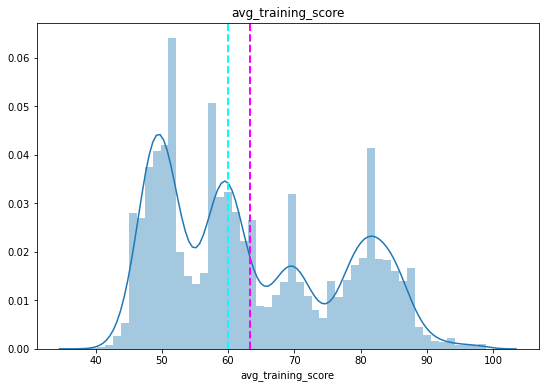

In [114]:
col = numarical_col[7]
df1[col].value_counts()
fig = plt.figure(figsize=(9,6))
ax = fig.gca()
feature = df1[col]
#feature.hist(bins=20, ax=ax)
sns.distplot(df1[col])
ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
ax.set_title(col)

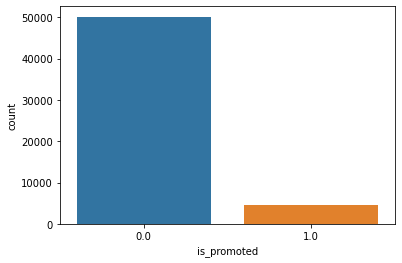

In [115]:
col = numarical_col[8]
df1[col].value_counts()
sns.countplot(df1[col])

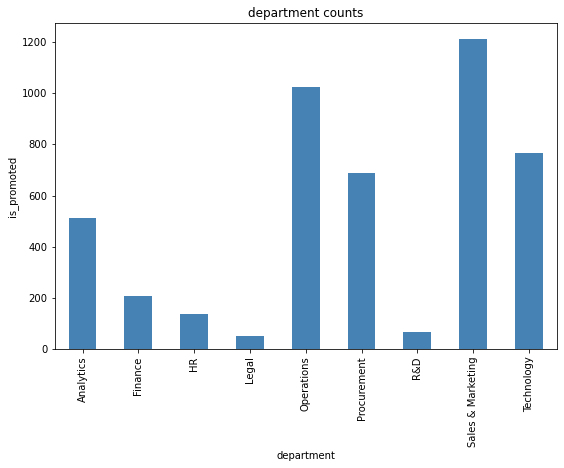

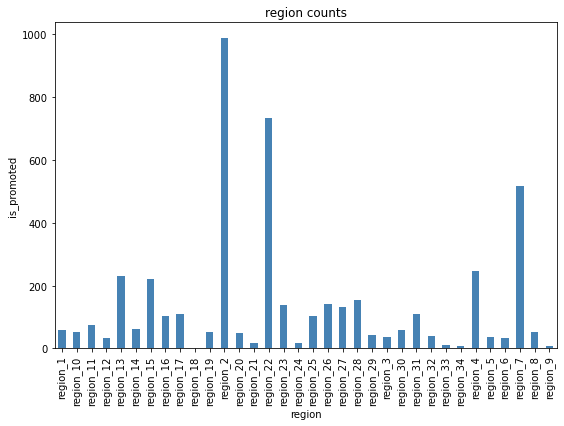

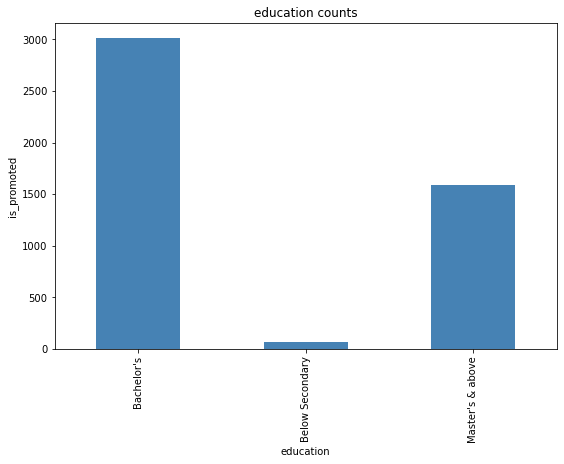

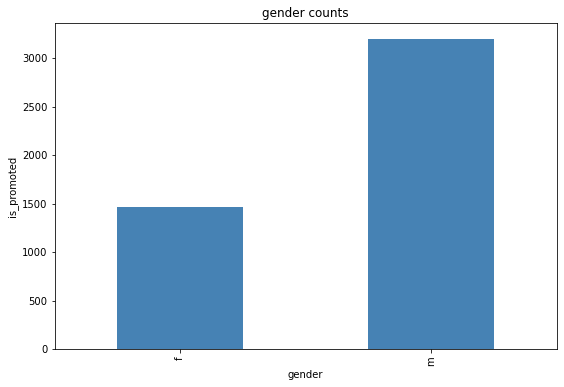

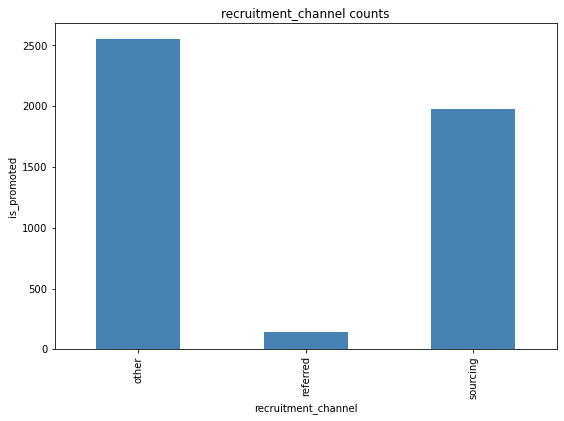

In [116]:
for col in categorial_col[:-1]:
    counts = df1.groupby(col)['is_promoted'].sum().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("is_promoted")
plt.show()

In [243]:
df2 = df1.copy()

In [244]:
## drop Department count and Regin, these columns have lots of catogry vlaues.
#df2 = df2.drop(['department','region'], axis=1)

In [245]:
## Drop employee id
df2 = df2.drop('employee_id', axis=1)

In [246]:
df2.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_metgreater80,awards_won,avg_training_score,is_promoted,Source
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0,train
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0,train
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0,train
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0,train
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0,train


In [247]:
df2['Fraction_of_services_training'] = df2['no_of_trainings']/df2['length_of_service']
df2['Fraction_of_services_training'].describe()

count    78298.000000
mean         0.373587
std          0.419387
min          0.029412
25%          0.142857
50%          0.250000
75%          0.500000
max          9.000000
Name: Fraction_of_services_training, dtype: float64

In [248]:
[i/10 for i in range(10)]

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [249]:
df2['Total_training_score'] = df2['no_of_trainings'] * df2['avg_training_score']
df2['Total_training_score'].describe(percentiles = [0.1, 0.2,.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,.95,.98,.99])

count    78298.000000
mean        79.759853
std         43.799629
min         39.000000
10%         49.000000
20%         51.000000
25%         53.000000
30%         56.000000
40%         60.000000
50%         64.000000
60%         73.000000
70%         81.000000
80%         90.000000
90%        140.000000
95%        168.000000
98%        213.000000
99%        255.000000
max        710.000000
Name: Total_training_score, dtype: float64

In [240]:
#new_df1 = df2.loc[(df2['Total_training_score']<400) & (df2['Source'] != 'test') ]

In [241]:
#new_df1.loc[new_df1['Source'] == 'test'].shape


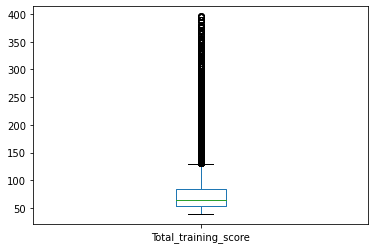

In [242]:
df2.loc[df2['Total_training_score']<400]['Total_training_score'].plot.box()

In [217]:
df2.drop(['no_of_trainings','avg_training_score'], axis=1, inplace=True)

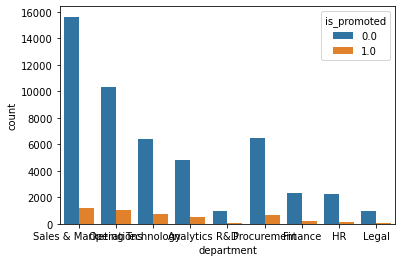

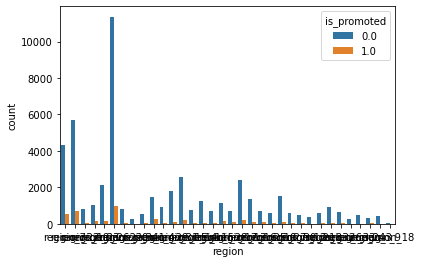

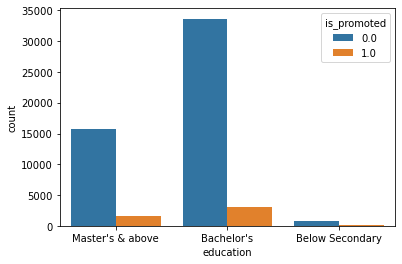

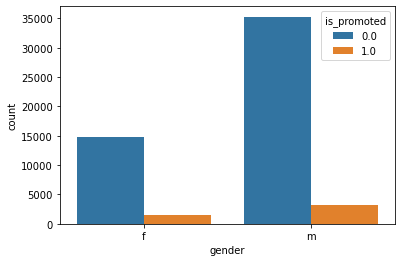

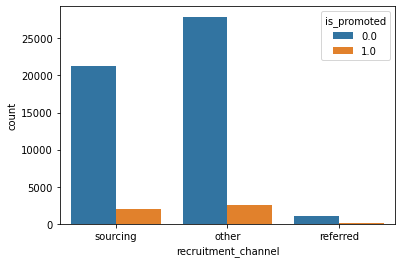

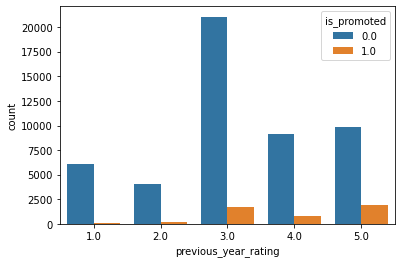

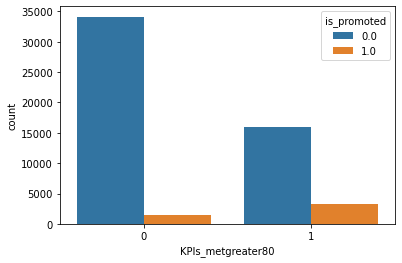

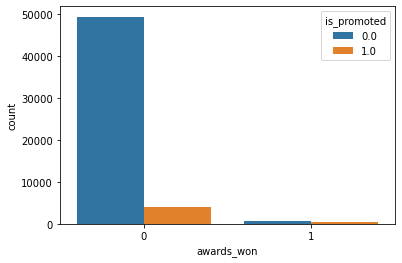

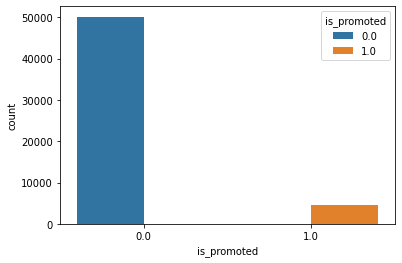

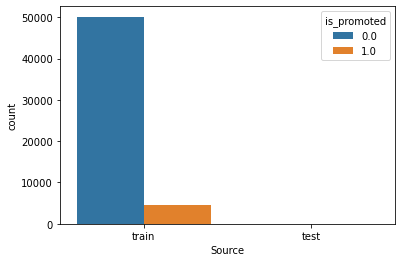

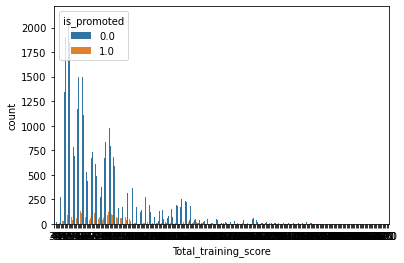

In [218]:
col = [col for col in df2.columns if col not in ['age','avg_training_score','length_of_service']]

for col in col:
    
    sns.countplot(x=col, hue='is_promoted', data=df2)
    
    plt.show()

In [219]:
#df2['services'] = df2['length_of_service']/df2['age']

In [220]:
#df2.drop(['length_of_service','age'], axis=1, inplace=True)

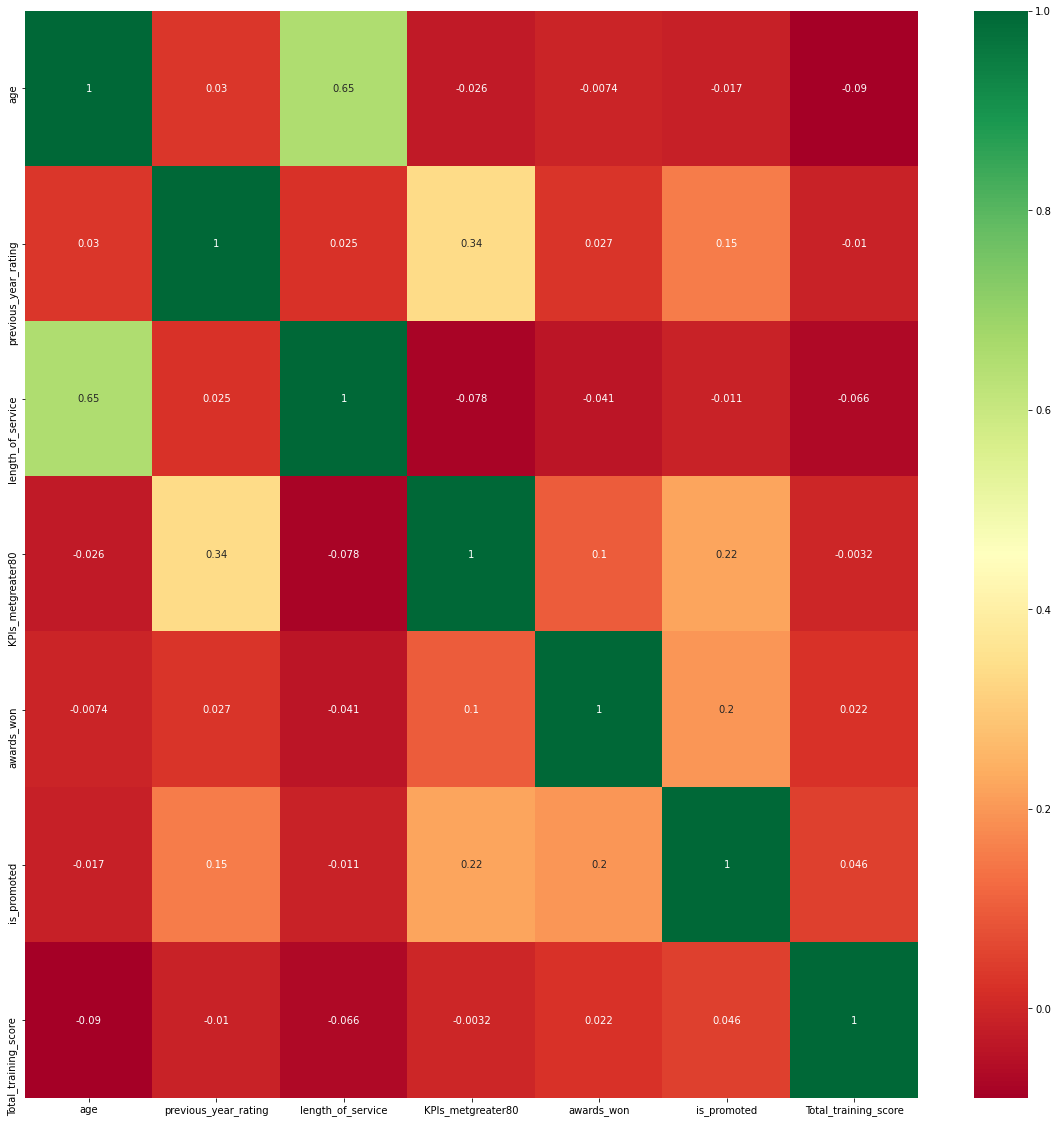

In [221]:
corrmat = df2.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df2[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [222]:
#df2.drop('department', axis=1, inplace=True)

In [223]:
df2.drop('recruitment_channel', axis=1, inplace=True)

In [224]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78298 entries, 0 to 78297
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            78298 non-null  object 
 1   region                78298 non-null  object 
 2   education             78298 non-null  object 
 3   gender                78298 non-null  object 
 4   age                   78298 non-null  int64  
 5   previous_year_rating  78298 non-null  float64
 6   length_of_service     78298 non-null  int64  
 7   KPIs_metgreater80     78298 non-null  int64  
 8   awards_won            78298 non-null  int64  
 9   is_promoted           54808 non-null  float64
 10  Source                78298 non-null  object 
 11  Total_training_score  78298 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 7.2+ MB


In [225]:
['education','gender','region','department']

['education', 'gender', 'region', 'department']

In [226]:

new_df = pd.get_dummies(columns=['education','gender','region','department'],\
                         data = df2, drop_first=True)

In [227]:
new_df

,age,previous_year_rating,length_of_service,KPIs_metgreater80,awards_won,is_promoted,Source,Total_training_score,education_Below Secondary,education_Master's & above,...,region_region_8,region_region_9,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology
0,35,5.0,8,1,0,0.0,train,49,0,1,...,0,0,0,0,0,0,0,0,1,0
1,30,5.0,4,0,0,0.0,train,60,0,0,...,0,0,0,0,0,1,0,0,0,0
2,34,3.0,7,0,0,0.0,train,50,0,0,...,0,0,0,0,0,0,0,0,1,0
3,39,1.0,10,0,0,0.0,train,100,0,0,...,0,0,0,0,0,0,0,0,1,0
4,45,3.0,2,0,0,0.0,train,73,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78293,24,3.0,1,0,0,NaN,test,61,1,0,...,0,0,0,0,1,0,0,0,0,0
78294,31,3.0,7,0,0,NaN,test,74,0,0,...,0,0,0,0,0,0,0,0,0,1
78295,26,4.0,4,0,0,NaN,test,50,0,0,...,0,0,0,1,0,0,0,0,0,0
78296,27,3.0,1,0,0,NaN,test,210,0,0,...,0,0,0,0,0,0,1,0,0,0


In [228]:
new_df.columns.values

array(['age', 'previous_year_rating', 'length_of_service',
       'KPIs_metgreater80', 'awards_won', 'is_promoted', 'Source',
       'Total_training_score', 'education_Below Secondary',
       "education_Master's & above", 'gender_m', 'region_region_10',
       'region_region_11', 'region_region_12', 'region_region_13',
       'region_region_14', 'region_region_15', 'region_region_16',
       'region_region_17', 'region_region_18', 'region_region_19',
       'region_region_2', 'region_region_20', 'region_region_21',
       'region_region_22', 'region_region_23', 'region_region_24',
       'region_region_25', 'region_region_26', 'region_region_27',
       'region_region_28', 'region_region_29', 'region_region_3',
       'region_region_30', 'region_region_31', 'region_region_32',
       'region_region_33', 'region_region_34', 'region_region_4',
       'region_region_5', 'region_region_6', 'region_region_7',
       'region_region_8', 'region_region_9', 'department_Finance',
       'depart

In [229]:
train_data = new_df.loc[new_df['Source'] == 'train']
test_data =  new_df.loc[new_df['Source'] == 'test']


In [230]:
train_data.drop('Source', axis=1 , inplace=True)
test_data.drop('Source', axis=1 , inplace=True)
test_data.drop('is_promoted', axis=1 , inplace=True)

In [231]:
train_data.to_csv('train_modified_5.csv',index=False)
test_data.to_csv('test_modified_5.csv',index=False)

In [232]:
print(train_data.shape)

(54808, 51)


In [55]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54808 entries, 0 to 54807
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            54808 non-null  int64  
 1   previous_year_rating           54808 non-null  float64
 2   length_of_service              54808 non-null  int64  
 3   KPIs_metgreater80              54808 non-null  int64  
 4   awards_won                     54808 non-null  int64  
 5   is_promoted                    54808 non-null  float64
 6   Total_training_score           54808 non-null  int64  
 7   Fraction_of_services_training  54808 non-null  float64
 8   education_Below Secondary      54808 non-null  uint8  
 9   education_Master's & above     54808 non-null  uint8  
 10  gender_m                       54808 non-null  uint8  
 11  department_Finance             54808 non-null  uint8  
 12  department_HR                  54808 non-null 

## XGBoost implementation

In [56]:
from sklearn.model_selection import train_test_split

#Import libraries:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import cross_validate  #Additional scklearn functions
from sklearn import metrics
from sklearn.model_selection import GridSearchCV   #Perforing grid search
from sklearn.model_selection import cross_val_score
import matplotlib.pylab as plt
from sklearn.model_selection import RandomizedSearchCV

In [57]:
### lets check imbalance data
100*(train_data.loc[train_data['is_promoted'] ==1]['is_promoted'].sum()/train_data.shape[0])

8.517004816815064

In [58]:
X = train_data.drop('is_promoted' , axis=1)
y= train_data['is_promoted']



In [179]:
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size=.2)

In [186]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
y_train.sum()/X_train.shape[0]

(43846, 12)
(10962, 12)
(43846,)
(10962,)


0.08500205263878119

In [70]:
def modelfit(xgb_model, X_train, y_train,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = xgb_model.get_xgb_params()
        xgtrain = xgb.DMatrix(X_train.values, label=y_train.values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=xgb_model.get_params()['n_estimators'], nfold=cv_folds,
                    metrics='auc', early_stopping_rounds=early_stopping_rounds, verbose_eval=None)
        xgb_model.set_params(n_estimators=cvresult.shape[0])
    
        #Fit the algorithm on the data
        xgb_model.fit(X_train, y_train,eval_metric='auc')
        
    #Predict training set:
    xtrain_predictions = xgb_model.predict(X_train)
    xtrain_predprob = xgb_model.predict_proba(X_train)[:,1]
        
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(y_train.values, xtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_train, xtrain_predprob))
    
#     Predict on testing data:
    X_test_probability = xgb_model.predict_proba(X_test)[:,1]
    #results = test_results.merge(dtest[['ID','predprob']], on='ID')
    print ('AUC Score (Test): %f' % metrics.roc_auc_score(y_test, X_test_probability))
    
    print(" -------\n \n" )
  
    ## Evaluate accuracy matrix
    # Predict the trading signal on train dataset
    X_train_pred = xgb_model.predict(X_train)
    # Predict the trading signal on test dataset
    X_test_pred = xgb_model.predict(X_test)
    
    ### Training dataset 
    print("Train data Eval")
    print ('Accuracy (train):', accuracy_score(y_train, X_train_pred))
    print ('F1 score (train):', f1_score(y_train, X_train_pred))
    print ('Recall (train):', recall_score(y_train, X_train_pred))
    print ('Precision (train):', precision_score(y_train, X_train_pred))
    
    print(" -------\n \n" )
    
#     ### Test dataset 
#     print("Test data Eval")
#     print ('Accuracy (test):', accuracy_score(y_test, X_test_pred))
#     print ('F1 score (test):', f1_score(y_test, X_test_pred))
#     print ('Recall (test):', recall_score(y_test, X_test_pred))
#     print ('Precision (test):', precision_score(y_test, X_test_pred))
    
    print(" Top Features -------\n \n" )           
    feat_imp = pd.Series(xgb_model.get_booster().get_score(importance_type='weight')).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

In [60]:
#booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]



## Hyper Parameter Optimization


n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score,
    'subsample' :[i/10.0 for i in range(6,10)],
    'colsample_bytree' :[i/10.0 for i in range(6,10)],
    'scale_pos_weight' :[1,2,3],
    'gama' :[i/10.0 for i in range(0,5)]
    }


In [61]:
xgb = XGBClassifier()

In [62]:

# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=xgb,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [63]:
random_cv.fit(X,y)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[00:06:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "gama" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:06:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                        'booster': ['gbtree', 'gblinear'],
                                        'colsample_bytree': [0.6, 0.7, 0.8,
                              

In [64]:

random_cv.best_estimator_

XGBClassifier(base_score=0.25, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gama=0.3, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1500, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [68]:
xgb1 = XGBClassifier(base_score=0.25, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gama=0.3, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=3,objective= 'binary:logistic',
              min_child_weight=1, monotone_constraints='()',
              n_estimators=1500, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [72]:
xgb1.fit(X,y)

[00:14:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "gama" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:14:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.25, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gama=0.3, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1500, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)


Model Report
Accuracy : 0.9273
AUC Score (Train): 0.862618
AUC Score (Test): 0.841620
 Train data Eval-------
 

Accuracy (train): 0.9273365871459198
F1 score (train): 0.2759090909090909
Recall (train): 0.16286557552991682
Precision (train): 0.9019316493313522
 Test data Eval-------
 

Accuracy (test): 0.9251049078635285
F1 score (test): 0.26102610261026105
Recall (test): 0.15409139213602552
Precision (test): 0.8529411764705882
 Top Features -------
 



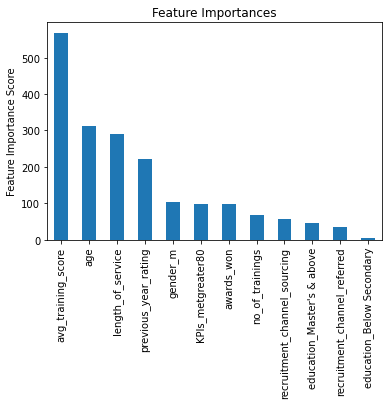

In [251]:
modelfit(xgb1,X_train, y_train,X_test,y_test)

In [198]:
# cv_folds = 5
# early_stopping_rounds = 50
# xgb_param = xgb1.get_xgb_params()
# xgtrain = xgb.DMatrix(X_train.values, label=y_train.values)
# cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=xgb1.get_params()['n_estimators'], nfold=cv_folds,
#             metrics='auc', early_stopping_rounds=early_stopping_rounds, verbose_eval=None)
# xgb1.set_params(n_estimators=cvresult.shape[0])
# #Fit the algorithm on the data
# xgb1.fit(X_train, y_train,eval_metric='auc')
# #Predict training set:
# xtrain_predictions = xgb1.predict(X_train)
# xtrain_predprob = xgb1.predict_proba(X_train)[:,1]
# #     Predict on testing data:
# X_test_probability = xgb1.predict_proba(X_test)[:,1]
# #results = test_results.merge(dtest[['ID','predprob']], on='ID')
# print ('AUC Score (Test): %f' % metrics.roc_auc_score(y_test, X_test_probability))
# feat_imp = pd.Series(xgb1.get_booster().get_score(importance_type='weight')).sort_values(ascending=False)
# feat_imp.plot(kind='bar', title='Feature Importances')
# plt.ylabel('Feature Importance Score')


In [228]:
# Predict the trading signal on test dataset
X_test_pred = xgb1.predict(X_test)


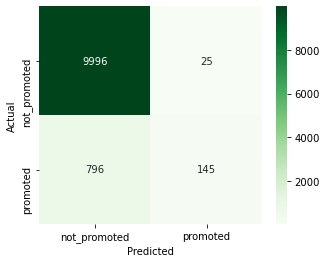

In [218]:
# Predict the trading signal on test dataset
X_test_pred = xgb1.predict(X_test)

# Predict the trading signal on test dataset
X_test_pred = xgb1.predict(X_test)
array = confusion_matrix(y_test, X_test_pred)
df = pd.DataFrame(array, index=['not_promoted', 'promoted'], columns=[
'not_promoted', 'promoted'])
plt.figure(figsize=(5, 4))
sns.heatmap(df, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

TN = array[0,0]
FN = array[1,0]
TP = array[1,1]
FP = array[0,1]
print(TN,FN,TP,FP)


print ('\n clasification report:\n', classification_report(y_test,X_test_pred))
print ('\n confussion matrix:\n',confusion_matrix(y_test, X_test_pred))


In [227]:
#precision , recall , f-score = 
#precision_recall_fscore_support(y_test, X_test_pred)
#print(precision , recall , f-score)
print ('Accuracy:', accuracy_score(y_test, X_test_pred))
print ('F1 score:', f1_score(y_test, X_test_pred))
print ('Recall:', recall_score(y_test, X_test_pred))
print ('Precision:', precision_score(y_test, X_test_pred))
print ('\n clasification report:\n', classification_report(y_test,X_test_pred))
print ('\n confussion matrix:\n',confusion_matrix(y_test, X_test_pred))

Accuracy: 0.9251049078635285
F1 score: 0.26102610261026105
Recall: 0.15409139213602552
Precision: 0.8529411764705882

 clasification report:
               precision    recall  f1-score   support

         0.0       0.93      1.00      0.96     10021
         1.0       0.85      0.15      0.26       941

    accuracy                           0.93     10962
   macro avg       0.89      0.58      0.61     10962
weighted avg       0.92      0.93      0.90     10962


 confussion matrix:
 [[9996   25]
 [ 796  145]]


In [222]:
TN = array[0,0]
FN = array[1,0]
TP = array[1,1]
FP = array[0,1]
print(TN,FN,TP,FP)

9996 796 145 25


#### Tunning XGBOOST Parameters 
## Tune max_depth and min_child_weightl

In [258]:
param_test1 = {
 'max_depth':range(2,16,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5,return_train_score=True)

gsearch1.fit(X_train,y_train)


[18:58:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, gamma=0, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=5, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=140, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=1, seed=27, subsample=0.8,
                                     tree_method=

In [254]:
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 4, 'min_child_weight': 1}, 0.8434910358692758)

In [321]:
param_test2 = {
 'max_depth':[2,3,4,5,6],
 'min_child_weight':range(1,2,3)
}
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=180, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=4, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5,return_train_score=True)

gsearch2.fit(X_train,y_train)

[23:29:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, gamma=0, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=5, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=250, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=4, seed=27, subsample=0.8,
                                     tree_method=

In [323]:
gsearch2.best_params_, gsearch2.best_score_

({'max_depth': 4, 'min_child_weight': 1}, 0.8418787023692355)

## Step 3: Tune gamma

In [262]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=300, max_depth=4,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5, return_train_score=True)

In [263]:
gsearch3.fit(X_train,y_train)

[19:31:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, gamma=0, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=4, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=300, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=1, seed=27, subsample=0.8,
                                     tree_method=

In [264]:
gsearch3.best_params_, gsearch3.best_score_

({'gamma': 0.0}, 0.8426971788463249)

In [267]:
xgb2 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=4,
 min_child_weight=1,
 gamma=0.0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

modelfit(xgb2,X_train, y_train,X_test,y_test)


Model Report
Accuracy : 0.9272
AUC Score (Train): 0.864952
AUC Score (Test): 0.840848
 -------
 

Train data Eval
Accuracy (train): 0.9271997445605072
F1 score (train): 0.27717391304347827
Recall (train): 0.16420713710759324
Precision (train): 0.888243831640058
 -------
 

Test data Eval
Accuracy (test): 0.9252873563218391
F1 score (test): 0.2680965147453083
Recall (test): 0.1594048884165781
Precision (test): 0.8426966292134831
 Top Features -------
 



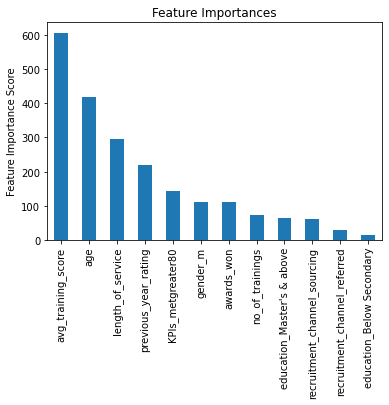

## Tune subsample & colsample

In [314]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=200, max_depth=4,
 min_child_weight=4, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)


In [315]:
gsearch4.fit(X_train,y_train)


[23:09:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, gamma=0, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=4, min_child_weight=4,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=1, seed=27, subsample=0.8,
                                     tree_method=

In [316]:
gsearch4.best_params_, gsearch4.best_score_

({'colsample_bytree': 0.7, 'subsample': 0.8}, 0.8429700236412566)

In [285]:
[i/100.0 for i in range(75,90,5)]

[0.75, 0.8, 0.85]

In [317]:
param_test5 = {
 'subsample':[i/100.0 for i in range(75,90,5)],
 'colsample_bytree':[.60,.65,.7,.75,.8]
}
gsearch5 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=200, max_depth=4,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=4,seed=27), 
 param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)


In [318]:
gsearch5.fit(X_train,y_train)

[23:14:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, gamma=0, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=4, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=4, seed=27, subsample=0.8,
                                     tree_method=

In [319]:
gsearch5.best_params_, gsearch5.best_score_

({'colsample_bytree': 0.75, 'subsample': 0.8}, 0.8427492984632373)

In [292]:
Backup has been completed.
Ticket edit & closed.
Backup track sheet updated.

SyntaxError: invalid syntax (<ipython-input-292-ccb0f9822951>, line 1)

In [320]:
param_test6 = {
 'reg_alpha':[0,1e-7,1e-6,1e-5, 1e-2, 0.1]
}
gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=4,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.75,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=4,seed=27), 
 param_grid = param_test6, scoring='roc_auc',n_jobs=4,iid=False, cv=5)


gsearch6.fit(X_train,y_train)

[23:16:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.75, gamma=0,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=4, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=177, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=4, seed=27, subsample=0.8,
                                     tree_method

In [324]:
gsearch6.best_params_, gsearch6.best_score_

({'reg_alpha': 1e-07}, 0.842989527141363)


Model Report
Accuracy : 0.9272
AUC Score (Train): 0.864952
AUC Score (Test): 0.840848
 -------
 

Train data Eval
Accuracy (train): 0.9271997445605072
F1 score (train): 0.27717391304347827
Recall (train): 0.16420713710759324
Precision (train): 0.888243831640058
 -------
 

Test data Eval
Accuracy (test): 0.9252873563218391
F1 score (test): 0.2680965147453083
Recall (test): 0.1594048884165781
Precision (test): 0.8426966292134831
 Top Features -------
 



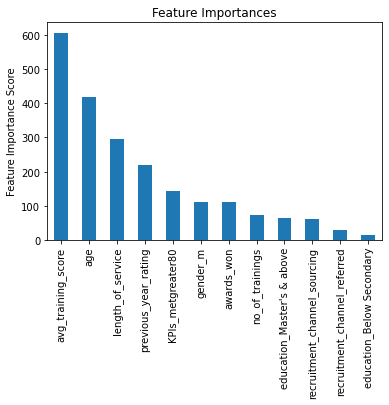

In [304]:
xgb3 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=4,
 min_child_weight=1,
 gamma=0.0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 reg_alpha=1e-07,
 seed=27)

modelfit(xgb3,X_train, y_train,X_test,y_test)

## Tuning scale_pos_weight

In [308]:
param_test7 = {
 'scale_pos_weight':[1,2,3,4,5]
}
gsearch7 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=180, max_depth=4,\
                                                  min_child_weight=1, gamma=0, subsample=0.8,\
                                                  colsample_bytree=0.84,objective= 'binary:logistic',\
                                                  reg_alpha=1e-07,
                                                  nthread=4, scale_pos_weight=1,seed=27), \
                        param_grid = param_test7, scoring='roc_auc',n_jobs=4,iid=False, cv=5)


gsearch7.fit(X_train,y_train)

[22:55:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.84, gamma=0,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=4, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=180, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=1e-07, reg_lambda=None,
                                     scale_pos_weight=1, seed=27, subsample=0.8,
                                     tree_metho

In [309]:
gsearch7.best_params_, gsearch7.best_score_

({'scale_pos_weight': 1}, 0.843503822669302)

### Reducing Learning Rate


Model Report
Accuracy : 0.8999
AUC Score (Train): 0.868353
AUC Score (Test): 0.840786
 -------
 

Train data Eval
Accuracy (train): 0.899945262965835
F1 score (train): 0.4228391001184055
Recall (train): 0.4311778910651999
Precision (train): 0.4148167268972638
 -------
 

Test data Eval
Accuracy (test): 0.8923554095967889
F1 score (test): 0.3796004206098843
Recall (test): 0.383634431455898
Precision (test): 0.3756503642039542
 Top Features -------
 



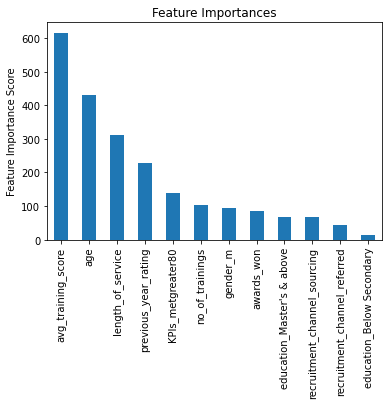

In [329]:

xgb4 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=2000,
 max_depth=4,
 min_child_weight=1,
 gamma=0.0,
 subsample=0.8,
 colsample_bytree=0.75,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=4,
 reg_alpha=1e-07,
 seed=27)

modelfit(xgb4,X_train, y_train,X_test,y_test)

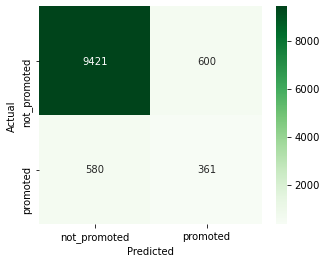

9421 580 361 600

 clasification report:
               precision    recall  f1-score   support

         0.0       0.94      0.94      0.94     10021
         1.0       0.38      0.38      0.38       941

    accuracy                           0.89     10962
   macro avg       0.66      0.66      0.66     10962
weighted avg       0.89      0.89      0.89     10962


 confussion matrix:
 [[9421  600]
 [ 580  361]]


In [326]:
# Predict the trading signal on test dataset
X_test_pred = xgb4.predict(X_test)
array = confusion_matrix(y_test, X_test_pred)
df = pd.DataFrame(array, index=['not_promoted', 'promoted'], columns=[
'not_promoted', 'promoted'])
plt.figure(figsize=(5, 4))
sns.heatmap(df, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

TN = array[0,0]
FN = array[1,0]
TP = array[1,1]
FP = array[0,1]
print(TN,FN,TP,FP)


print ('\n clasification report:\n', classification_report(y_test,X_test_pred))
print ('\n confussion matrix:\n',confusion_matrix(y_test, X_test_pred))


In [74]:
import pickle
Pkl_Filename = "HR_Smote_XGboostModel_4.pkl" 

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(xgb1, file)

In [78]:
mytestdata = pd.read_csv('test_modified_4.csv')

In [79]:
mytestdata.head()

,age,previous_year_rating,length_of_service,KPIs_metgreater80,awards_won,Total_training_score,Fraction_of_services_training,education_Below Secondary,education_Master's & above,gender_m,...,region_region_31,region_region_32,region_region_33,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9
0,24,3.0,1,1,0,77,1.000000,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,31,3.0,5,0,0,51,0.200000,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,31,1.0,4,0,0,47,0.250000,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,31,2.0,9,0,0,195,0.333333,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,30,4.0,7,0,0,61,0.142857,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [80]:
# Predict the trading signal on test dataset
X_test_pred = xgb1.predict(mytestdata)

In [81]:
test = pd.read_csv('test.csv')
test_emp_id = test[['employee_id']]
test_emp_id

,employee_id
0,8724
1,74430
2,72255
3,38562
4,64486
...,...
23485,53478
23486,25600
23487,45409
23488,1186


In [82]:
test_emp_id['is_promoted'] = X_test_pred
test_emp_id['is_promoted'] = test_emp_id['is_promoted'].astype(int)

In [83]:
test_emp_id['is_promoted'].value_counts()

0    22742
1      748
Name: is_promoted, dtype: int64

In [85]:
test_emp_id.to_csv('Submission_4.csv',index=False)